In [30]:
import pandas as pd
import numpy as np
from scipy import spatial
import scipy.sparse.linalg
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

###  Religion distances

In [31]:
data = pd.read_pickle(r'DataEnriching\data.pickle')
data.reset_index(inplace=True)
data.drop([('name','')], axis=1, inplace=True)
data.set_index('ISO2', inplace=True)
cols = data.columns.tolist()[15:]
rel_data = data[cols]
rel_data.head()

religion                                                          \
     protestants catholics ortodox buddhism hindu jewish muslim oriental   
ISO2                                                                       
AW         0.049     0.753     0.0      0.0   0.0    0.0  0.000      0.0   
AF         0.000     0.000     0.0      0.0   0.0    0.0  0.997      0.0   
AO         0.381     0.411     0.0      0.0   0.0    0.0  0.000      0.0   
AI         0.732     0.068     0.0      0.0   0.0    0.0  0.000      0.0   
AX         0.000     0.000     0.0      0.0   0.0    0.0  0.000      0.0   

                                         
     other animist atheist unaffiliated  
ISO2                                     
AW     0.0     0.0     0.0          0.0  
AF     0.0     0.0     0.0          0.0  
AO     0.0     0.0     0.0          0.0  
AI     0.0     0.0     0.0          0.0  
AX     0.0     0.0     0.0          0.0

In [32]:
rel_distances = spatial.distance.squareform(spatial.distance.pdist(rel_data,'euclidean'))

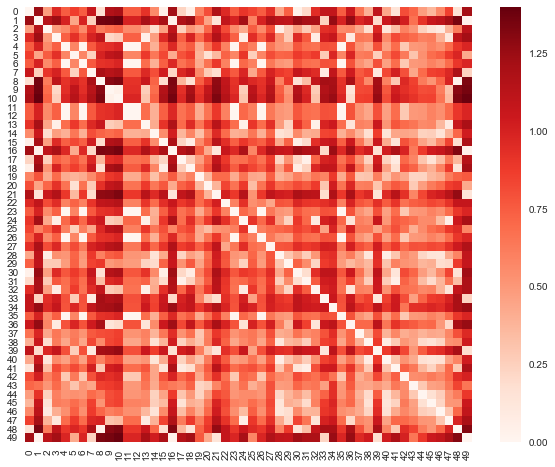

In [33]:
# displaying a subset of the distances matrix :
plt.figure(figsize=[10,8])
sns.heatmap(rel_distances[:50,:50],cmap="Reds");

In [34]:
rel_distance_df = pd.DataFrame(rel_distances, index=rel_data.index.tolist(), columns=rel_data.index.tolist())
rel_distance_df

,AW,AF,AO,AI,AX,AL,AD,AE,AR,AM,...,VG,VI,VN,VU,WF,WS,YE,ZA,ZM,ZW
AW,0.000000,1.250368,0.476642,0.967323,0.754593,0.868863,0.754593,1.070649,0.170675,1.163520,...,0.931486,0.680625,0.692684,0.905230,0.242012,0.877958,1.245589,0.752222,0.893989,0.975531
AF,1.250368,0.000000,1.143718,1.238732,0.997000,0.446681,0.997000,0.253513,1.356912,1.367518,...,1.222741,1.207356,1.001346,1.224494,1.405030,1.248487,0.006000,1.050391,1.265631,1.255845
AO,0.476642,1.143718,0.000000,0.490765,0.560430,0.753654,0.560430,0.911703,0.624341,0.690613,...,0.455067,0.220731,0.513470,0.429104,0.693110,0.407571,1.138492,0.340661,0.426691,0.499813
AI,0.967323,1.238732,0.490765,0.000000,0.735152,0.928957,0.735152,0.997190,1.110517,0.215035,...,0.041255,0.306835,0.727307,0.064498,1.177246,0.126143,1.233908,0.366320,0.135636,0.031385
AX,0.754593,0.997000,0.560430,0.735152,0.000000,0.579753,0.000000,0.765310,0.920435,0.936000,...,0.707874,0.680955,0.103339,0.710898,0.990000,0.751473,0.991000,0.373125,0.779624,0.763634
AL,0.868863,0.446681,0.753654,0.928957,0.579753,0.000000,0.579753,0.244894,0.999656,1.101004,...,0.905207,0.855461,0.576592,0.903708,1.057456,0.928453,0.440908,0.666427,0.950540,0.949974
AD,0.754593,0.997000,0.560430,0.735152,0.000000,0.579753,0.000000,0.765310,0.920435,0.936000,...,0.707874,0.680955,0.103339,0.710898,0.990000,0.751473,0.991000,0.373125,0.779624,0.763634
AE,1.070649,0.253513,0.911703,0.997190,0.765310,0.244894,0.765310,0.000000,1.195533,1.137241,...,0.980013,0.971185,0.770220,0.982383,1.251319,1.009818,0.247913,0.797648,1.028578,1.015981
AR,0.170675,1.356912,0.624341,1.110517,0.920435,0.999656,0.920435,1.195533,0.000000,1.298405,...,1.075382,0.813449,0.857950,1.047099,0.075498,1.012873,1.352509,0.917138,1.026262,1.115983
AM,1.163520,1.367518,0.690613,0.215035,0.936000,1.101004,0.936000,1.137241,1.298405,0.000000,...,0.251074,0.485094,0.932699,0.266593,1.362423,0.285895,1.363150,0.574601,0.272567,0.195921


### Government type distances

In [35]:
data = pd.read_pickle(r'DataEnriching\data.pickle')
data.reset_index(inplace=True)
data.set_index('ISO2', inplace=True)

In [36]:
gov_type_df = data[['gov_type_num']]

gov_distance_df = pd.DataFrame(columns=gov_type_df.index.tolist())

for country1, value1 in zip(gov_type_df.index.tolist(), gov_type_df['gov_type_num']):
    row = []
    for country1, value2 in zip(gov_type_df.index.tolist(), gov_type_df['gov_type_num']):
        row.append(abs(value1-value2))
    
    
    dictionary = dict(zip(data.index.tolist(), row))
    gov_distance_df = gov_distance_df.append(dictionary, ignore_index=True)
    
gov_distance_df.index = gov_type_df.index
gov_distance_df

,AW,AF,AO,AI,AX,AL,AD,AE,AR,AM,...,VG,VI,VN,VU,WF,WS,YE,ZA,ZM,ZW
ISO2,,,,,,,,,,,,,,,,,,,,,
AW,0.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,...,0.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0
AF,2.0,0.0,0.0,2.0,1.0,2.0,2.0,2.0,0.0,0.0,...,2.0,0.0,0.0,2.0,2.0,2.0,1.0,2.0,0.0,0.0
AO,2.0,0.0,0.0,2.0,1.0,2.0,2.0,2.0,0.0,0.0,...,2.0,0.0,0.0,2.0,2.0,2.0,1.0,2.0,0.0,0.0
AI,0.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,...,0.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0
AX,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
AL,0.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,...,0.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0
AD,0.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,...,0.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0
AE,0.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,...,0.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0
AR,2.0,0.0,0.0,2.0,1.0,2.0,2.0,2.0,0.0,0.0,...,2.0,0.0,0.0,2.0,2.0,2.0,1.0,2.0,0.0,0.0


In [37]:
rel_distance_df.to_pickle('rel_distance_df.pickle')
gov_distance_df.to_pickle('gov_distance_df.pickle')